In [11]:
import sys
import os

#path_src = os.path.join(os.path.dirname(os.path.abspath(os.getcwd())))
path_src = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
print(path_src)

sys.path.append(path_src)
os.chdir(path_src)

/


In [12]:
from src.mslm.dataloader.keypoint_dataset import KeypointDataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [13]:
datasetPath = "/run/media/giorgio6846/DataModels/processed_oldver/dataset_val.hdf5"
kd = KeypointDataset(datasetPath, return_label=True)

In [14]:
def preview_video(index, random_video):
    if random_video:
        import random
        idx = random.randrange(0, len(kd))
    else:
        if index > len(kd):
            raise ValueError("index mayor a video")
        idx = index
    
    keypoints = kd[idx][0]
    print(kd[idx][0].size())
    print(kd[idx][2])

    fig, ax = plt.subplots(figsize=(6, 6))
    scat = ax.scatter(keypoints[1, :, 0], keypoints[1, :, 1], s=20, c='blue')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.set_title("Frame 0")

    def update(frame_index):
        points = keypoints[frame_index]       # [250, 2]
        scat.set_offsets(points)           # Move every scatter point to new coords
        ax.set_title(f"Frame {frame_index}")
        return (scat,)
    
    anim = FuncAnimation(
        fig,
        update,
        frames=keypoints.shape[0],  # 148
        interval=33,             # 50 ms between frames (≈20 FPS)
        blit=True
    )
    return HTML(anim.to_jshtml())


torch.Size([45, 134, 2])
1


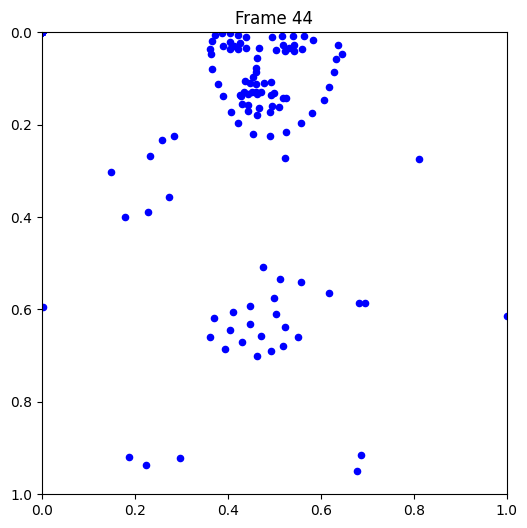

In [17]:
preview_video(1, False)